# Bias-Variance Trade off

When you train any machine learning model you will get some kind of error. The error takes the following form:
$$\begin{split}\Large \begin{array}{rcl}
\text{Err}\left(\textbf{x}\right) &=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}\end{split}$$

- squared bias: $\text{Bias}\left(\widehat{f}\right)$  is the average error for all sets of data;
- variance: $\text{Var}\left(\widehat{f}\right)$ is error variability, or by how much error will vary if we train the model on different sets of data;
- irremovable error: $\sigma^2$

![alt text](./imgs/topic4_bias_variance.png)

How those errors occur?

![Alt text](./imgs/Bias-and-Variance-in-Machine-Learning.webp)

**Bias**: Your model `underfits` your data. It cannot grasp enough useful information from your data.<br>
**Variance**: Your model `overfits` your data. It, basically, remembers all your dataset.

You cannot remove **bias** and **variance** completely. However, you can find a balance.
![alt](./imgs/topic4_bias_variance2.png)

## Best practices 

**Techniques to Reduce Underfitting**
- Use a more complex model
- Add new features and perform feature engineering
- Reduce regularization
- Train for more epochs
- Scale features properly<br><br>
**Techniques to Reduce Overfitting**
- Collect more training data
- Reduce model complexity
- Use regularization (L1/L2)
- Use early stopping
- Clean noisy data

# Regularization

## L2 regularization (Ridge Regression)

For Ridge regression we are optimizing the following loss function.

$$\begin{split}\Large \begin{array}{rcl}
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \alpha * \left\| \textbf{w}\right\|^2\\
\end{array}\end{split}$$
where:<br>
$\alpha$: regularization strength<br>
The bigger the alpha the more you are restricting your model and the more you are stabilizing your model.

In [8]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.095)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
print(reg.coef_)
print(reg.intercept_)

[0.44340723 0.44340723]
0.0710618436406068


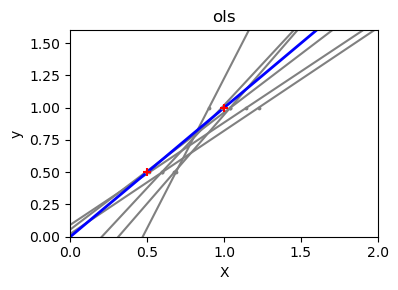

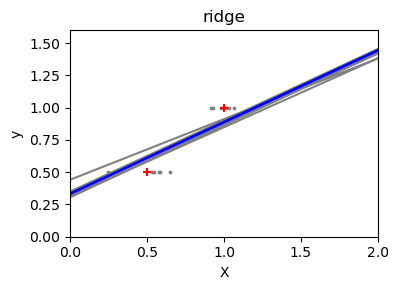

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

X_train = np.c_[0.5, 1].T
y_train = [0.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(
    ols=linear_model.LinearRegression(), ridge=linear_model.Ridge(alpha=0.1)
)

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = 0.1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color="gray")
        ax.scatter(this_X, y_train, s=3, c="gray", marker="o", zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color="blue")
    ax.scatter(X_train, y_train, s=30, c="red", marker="+", zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel("X")
    ax.set_ylabel("y")

    fig.tight_layout()

plt.show()

## L1 Regularization (Lasso)

With Lasso you are optimizing the following function:
$$\begin{split}\Large \begin{array}{rcl}
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \alpha * \left\| \textbf{w}\right\|\\
\end{array}\end{split}$$

Lasso sets weights of "useless" features to 0, therefore, we can use it as a feature selection method.

## Elastic Net

Elastic Net is the combination of L1 and L2 regularization:
$$\begin{split}\Large \begin{array}{rcl} \mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &\frac{1}{2 n_{\rm samples}} \cdot \|y - X w\|_2^2 + \alpha \cdot {\rm l1\_{ratio}} \cdot \|w\|_1 + 0.5 \cdot \alpha \cdot (1 - {\rm l1\_{ratio}}) \cdot \|w\|_2^2\end{array}\end{split}$$